# **ANÁLISE DAS EDIFICAÇÕES RELIGIOSAS EM ALAGOAS**
**Por:** **Lucas Falcão**  
[GitHub](https://github.com/Falkzera)  
[Instagram](https://www.instagram.com/falkzera/)

### RESUMO
O presente notebook busca realizar uma análise das edificações RELIGIOSAS em Alagoas, filtrando a base de dados do IBGE (2022) e buscando identificar o domínio de cada edificação. Utilizando técnicas de processamento e categorização de dados.  
  
Para alcançar esse objetivo, o notebook emprega um dicinário para determinar a classificação de cada edificação com base nos nomes das cadastrados da edificação. Após a categorização, os dados são organizados e salvos em um arquivo Excel para facilitar a visualização e análise futura.  
  
A parte de análise da segmentação está sujeita a alterações a qualquer momento, conforme novas informações ou melhorias no processamento dos dados. O notebook também visa proporcionar uma compreensão mais profunda da distribuição e características das edificações.
  
Também está presente a visualização gráfica dos dados, como também um mapa interativo que poderá ter atualizações e melhorias futuras.

# 1. Importação, Filtros e Organização

#### Base de dados retirados do IBGE
Cadastro Nacional de Endereços para Fins Estatísticos  
[Base de Dados](https://www.ibge.gov.br/estatisticas/sociais/populacao/38734-cadastro-nacional-de-enderecos-para-fins-estatisticos.html?=&t=resultados)

#### Importação das bibliotecas necessárias

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from folium.plugins import MarkerCluster, HeatMap
import folium

In [13]:
data_original = pd.read_csv('27_AL.csv', sep=';')
data_original.shape

C:\Users\lucas\AppData\Local\Temp\ipykernel_12940\1527610666.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_original = pd.read_csv('27_AL.csv', sep=';')


(1626565, 34)

### Filtrando apenas as edificações religiosas

In [14]:
# Por categoria COD_ESPECIE
'''
1=Domicílio particular
2=Domicílio coletivo
3=Estabelecimento agropecuário
4=Estabelecimento de ensino
5=Estabelecimento de saúde
6=Estabelecimento de outras finalidades
7=Edificação em construção ou reforma
8=Estabelecimento religioso
'''
data_01 = data_original[data_original['COD_ESPECIE'] == 1] # Domicílio particular
data_02 = data_original[data_original['COD_ESPECIE'] == 2] # Domicílio coletivo
data_03 = data_original[data_original['COD_ESPECIE'] == 3] # Estabelecimento agropecuário
data_04 = data_original[data_original['COD_ESPECIE'] == 4] # Estabelecimento de ensino
data_05 = data_original[data_original['COD_ESPECIE'] == 5] # Estabelecimento de saúde
data_06 = data_original[data_original['COD_ESPECIE'] == 6] # Estabelecimento de outras finalidades
data_07 = data_original[data_original['COD_ESPECIE'] == 7] # Edificação em construção ou reforma
data_08 = data_original[data_original['COD_ESPECIE'] == 8] # Estabelecimento religioso

### Coletando os nomes dos Municípios através de seus códigos
Os [códigos dos Municipíos](https://www.ibge.gov.br/explica/codigos-dos-municipios.php) são definidos pelo IBGE
  
Como a base de dados incial não possuí a nomeclatura dos Municípios, foi necessário importa-lós


#### Filtrando o novo Dataframe

In [15]:
data_nomes = pd.read_excel(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\IBGE\CENSO_2022\RELATORIO_DTB_BRASIL_MUNICIPIO.xls')
data_uf = data_nomes.copy()

data_uf = data_nomes[data_nomes['Nome_UF'] == 'Alagoas'] # Selecionando apenas os municípios de Alagoas

### Concatenando os DataFrames
Concatenando os Dataframes para conseguir o nome do Município através de seu código

In [16]:
# Concatenar uma planilha com outra, colocando na mesma linha o #COD_MUNICIPIO e o # Código Município Completo
data_01_uf = pd.merge(data_01, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_02_uf = pd.merge(data_02, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_03_uf = pd.merge(data_03, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_04_uf = pd.merge(data_04, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_05_uf = pd.merge(data_05, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_06_uf = pd.merge(data_06, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_07_uf = pd.merge(data_07, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')
data_08_uf = pd.merge(data_08, data_uf, left_on='COD_MUNICIPIO', right_on='Código Município Completo', how='left')

# Para salvar e utilizar em outro projeto.
# data_xx_uf.to_csv('Coordenadas_AL.csv', sep=';', index=False)

In [17]:
data_escolhido = data_08_uf.copy() # Data Escolhido para análise

resultado_final = data_escolhido
resultado_final.shape

(8736, 47)

### Ordenando o Dataframe e organizando as colunas necessárias

In [18]:
# Colocar em ordem alfabetica o Nome_Municipio
resultado_final = resultado_final.sort_values('Nome_Município')

nova_ordem = ['Nome_Mesorregião', 'COD_MUNICIPIO' ,'LATITUDE', 'LONGITUDE' ,'Nome_Município', 'CEP', 'DSC_LOCALIDADE', 'DSC_ESTABELECIMENTO', ]
resultado_final = resultado_final[nova_ordem]

# Renomeando colunas
resultado_final = resultado_final.rename(columns={
    'Nome_Município': 'MUNICÍPIO',
    'CEP': 'CEP',
    'DSC_LOCALIDADE': 'BAIRRO',
    'DSC_ESTABELECIMENTO': 'EDIFICAÇÃO_RELIGIOSA',
    'LATITUDE': 'LATITUDE',
    'LONGITUDE': 'LONGITUDE',
    'Nome_Mesorregião': 'REGIÃO',
    'COD_MUNICIPIO': 'CD_MUN'
})

#### Categorização das vertentes religiosas
**Sujeito a alteração**

In [19]:
# Dicionários para diferentes tipos de igrejas
dicionario_catolica = {
    'Católica': [
        'católica', 'catolica', 'mae', 'capela', 'capelinha', 'crista', 
        'santo', 'santa', 'padre', 'paróquia', 'santuário', 'benedito', 
        'venerável', 'missão', 'religioso', 'igrejinha', 'nossa', 'senhora', 'aparecida'
        'diocese', 'arquidiocese', 'capelania', 'maria', 'catedral', 'são', 'sao',
        'foranina', 'forania', 'paroquia', 'paróquia', 'paroquial', 'paroquial', 'paroquiais',
        'diocesano', 'apostolico', 'apostolica', 'pascom', 'paroquial', 'paroquiais', 'catedral',
        'nossa senhora', 'senhor', 'bonfim'

        
    ]
}

dicionario_evangelica = {
    'Evangélica': [
        'batista', 'assembleia', 'presbiteriana', 'evangélica', 'evangelica', 
        'adventista', 'nazareno', 'a d', 'ad', 'evangelico', 
        'pentecostal', 'universal', 'verbo', 'jerusalem', 'petencostal', 
        'evangelistico', 'fiel', 'isjc', 'vida', 'congregacional', 
        'sacred', 'igreja do evangelho pleno', 'deus', 'oracao', 'bencao',
        'ultimo', 'dia', 'dominical', 'celula', 'célula'
        
    ]
}

dicionario_umbanda = {
    'Umbanda': [
        'umbanda', 'oxum', 'abaca', 'axe', 'camdomble', 'candomble', 
        'ogum', 'xangô', 'caboclo', 'pombagira', 'gira', 'escola de umbanda',
        'terreiro', 'assentamento', 'templo de umbanda', 'casa de umbanda',
        'centro de umbanda', 'pai de santo', 'mae de santo', 'exu', 'caboclo',
        'cabocla', 'caboclos', 'caboclas', 'caboclo boiadeiro', 'caboclo flecheiro',
        'caboclo tupinambá', 'caboclo tupinamba', 'caboclo tupinambá', 'caboclo tupinamba',
        'nago', 'ile', 'ile axe', 'casa de santo', 'casa de candomble', 'afro', 'afro-brasileira',
        'yle', 'iemanja', 'iemanjá', 'iemanjá', 'camdomble',
        
    ]
}

dicionario_espirita = {
    'Espirita': [
        'espirita', 'espírita', 'espiritismo', 'allan kardec', 'centro espirita', 
        'sociedade espirita', 'casa espirita', 'doutrina espirita', 'kardecismo',
        'kardecista', 'kardec', 'kardecista', 'kardecismo', 'kardecista', 'kardecismo',
        'federacao espirita', 'comunidade espirita', 'mesa branca', 'mesa'

    ]
}

### Criação de uma nova coluna por segmentação religiosa


In [20]:

# Função para identificar o tipo de igreja usando os dicionários
def identificar_igreja(nome):
    nome = nome.lower()
    for tipo, palavras in dicionario_catolica.items():
        if any(palavra in nome for palavra in palavras):
            return tipo
    for tipo, palavras in dicionario_evangelica.items():
        if any(palavra in nome for palavra in palavras):
            return tipo
    for tipo, palavras in dicionario_umbanda.items():
        if any(palavra in nome for palavra in palavras):
            return tipo
    for tipo, palavras in dicionario_espirita.items():
        if any(palavra in nome for palavra in palavras):
            return tipo
    return 'Outros'

# Aplicar a função ao DataFrame
resultado_final['TIPOLOGIA'] = resultado_final['EDIFICAÇÃO_RELIGIOSA'].apply(identificar_igreja)

# Ordenar o DataFrame em ordem alfabética pela coluna 'EDIFICAÇÃO_RELIGIOSA'
resultado_final.sort_values(by='MUNICÍPIO')

# Resetar o índice do DataFrame resultante
resultado_final.reset_index(drop=True, inplace=True)

#### Identificando as edificações religiosas que ficaram sem segmento

In [21]:
apenas_outros = resultado_final[resultado_final['TIPOLOGIA'] == 'Outros']
apenas_outros.shape # A quantidade de linhas representa a quantidade de edificações religiosas que não foram classificadas

(1705, 9)

#### Exportação para arquivo Excel

In [22]:
resultado_final.to_excel('Edificacoes_Religiosas_AL.xlsx') # Salvando em Excel

### Definição por quantidade

In [23]:
por_grupo = resultado_final.copy() # Criando uma outra categoria para agrupar os dados

por_grupo = por_grupo.groupby(['MUNICÍPIO', 'TIPOLOGIA']).size().reset_index(name='Contagem') # Agrupando por Município e Tipologia
sorted(por_grupo)

with pd.ExcelWriter('Edificacoes_Religiosas_AL.xlsx', mode='a', engine='openpyxl') as writer: # Salvando em Excel
    por_grupo.to_excel(writer, sheet_name='Por_grupo', index=False) # Salvando em Excel

# 2. Vizualização gráfica

In [24]:
# Definição das palhetas de Cores:
cores_pet_1 = ['#0b4754', '#54180b', '#9a6233', '#ffdd63']
cores_pet_2 = ['#148098', '#116d81', '#0e5a6b', '#0b4754', '#08343d', '#052127', '#020e10']


In [25]:
resultado_final

,REGIÃO,CD_MUN,LATITUDE,LONGITUDE,MUNICÍPIO,CEP,BAIRRO,EDIFICAÇÃO_RELIGIOSA,TIPOLOGIA
0,Leste Alagoano,2700201,-9.710253,-36.259264,Anadia,57660000,VAQUEJADOR,IGREJA BATISTA INDEPENDENTE,Evangélica
1,Leste Alagoano,2700201,-9.683089,-36.299757,Anadia,57660000,CENTRO,ASSEMBLEIA DE DEUS,Evangélica
2,Leste Alagoano,2700201,-9.685669,-36.303865,Anadia,57660000,CENTRO,SANTUARIO MAE RAINHA,Católica
3,Leste Alagoano,2700201,-9.684968,-36.304600,Anadia,57660000,CENTRO,IGREJA NOSSA SENHORA DA PIEDADE,Católica
4,Leste Alagoano,2700201,-9.691578,-36.306965,Anadia,57660000,CHA DA MANGABEIRA,IGREJA PENTECOSTAL JESUS E VIDA,Evangélica
...,...,...,...,...,...,...,...,...,...
8731,Sertão Alagoano,2700102,-9.265637,-37.934381,Água Branca,57490000,CENTRO,1 IGREJA BATISTA,Evangélica
8732,Sertão Alagoano,2700102,-9.261478,-37.936132,Água Branca,57490000,CENTRO,IGREJA DE NSRA DO ROSARIO,Evangélica
8733,Sertão Alagoano,2700102,-9.260467,-37.932937,Água Branca,57490000,CENTRO,CAPELA DE STA INES,Católica
8734,Sertão Alagoano,2700102,-9.383123,-37.887669,Água Branca,57490000,CACHOEIRINHA,IGREJINHA,Católica


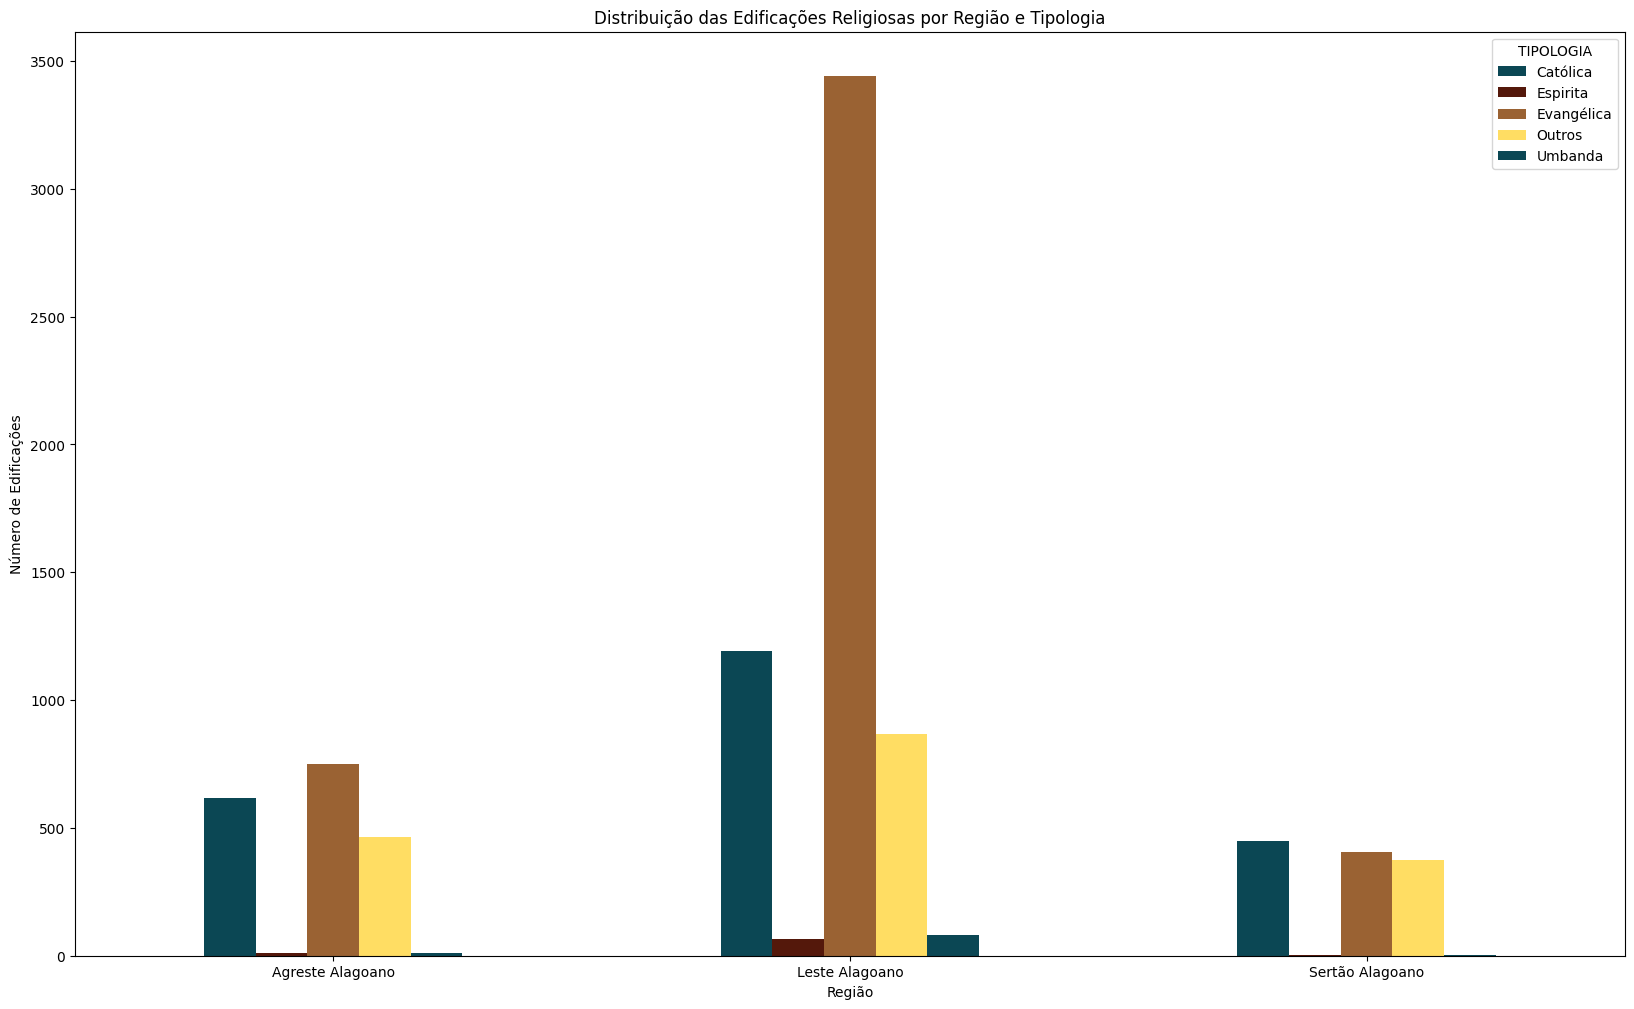

In [26]:
# Plota o gráfico de barras com a paleta de cores personalizada
resultado_final.groupby(['REGIÃO', 'TIPOLOGIA']).size().unstack().plot(kind='bar', color=cores_pet_1, figsize=(20, 12)) # Plota o gráfico de barras com a paleta de cores personalizada

# Adiciona títulos e rótulos aos eixos
plt.title('Distribuição das Edificações Religiosas por Região e Tipologia')
plt.xlabel('Região')
plt.ylabel('Número de Edificações')


# Rotaciona os rótulos do eixo X (REGIÃO)
plt.xticks(rotation=0, ha='center')  # 'ha' é para alinhar os rótulos à direita

plt.show()

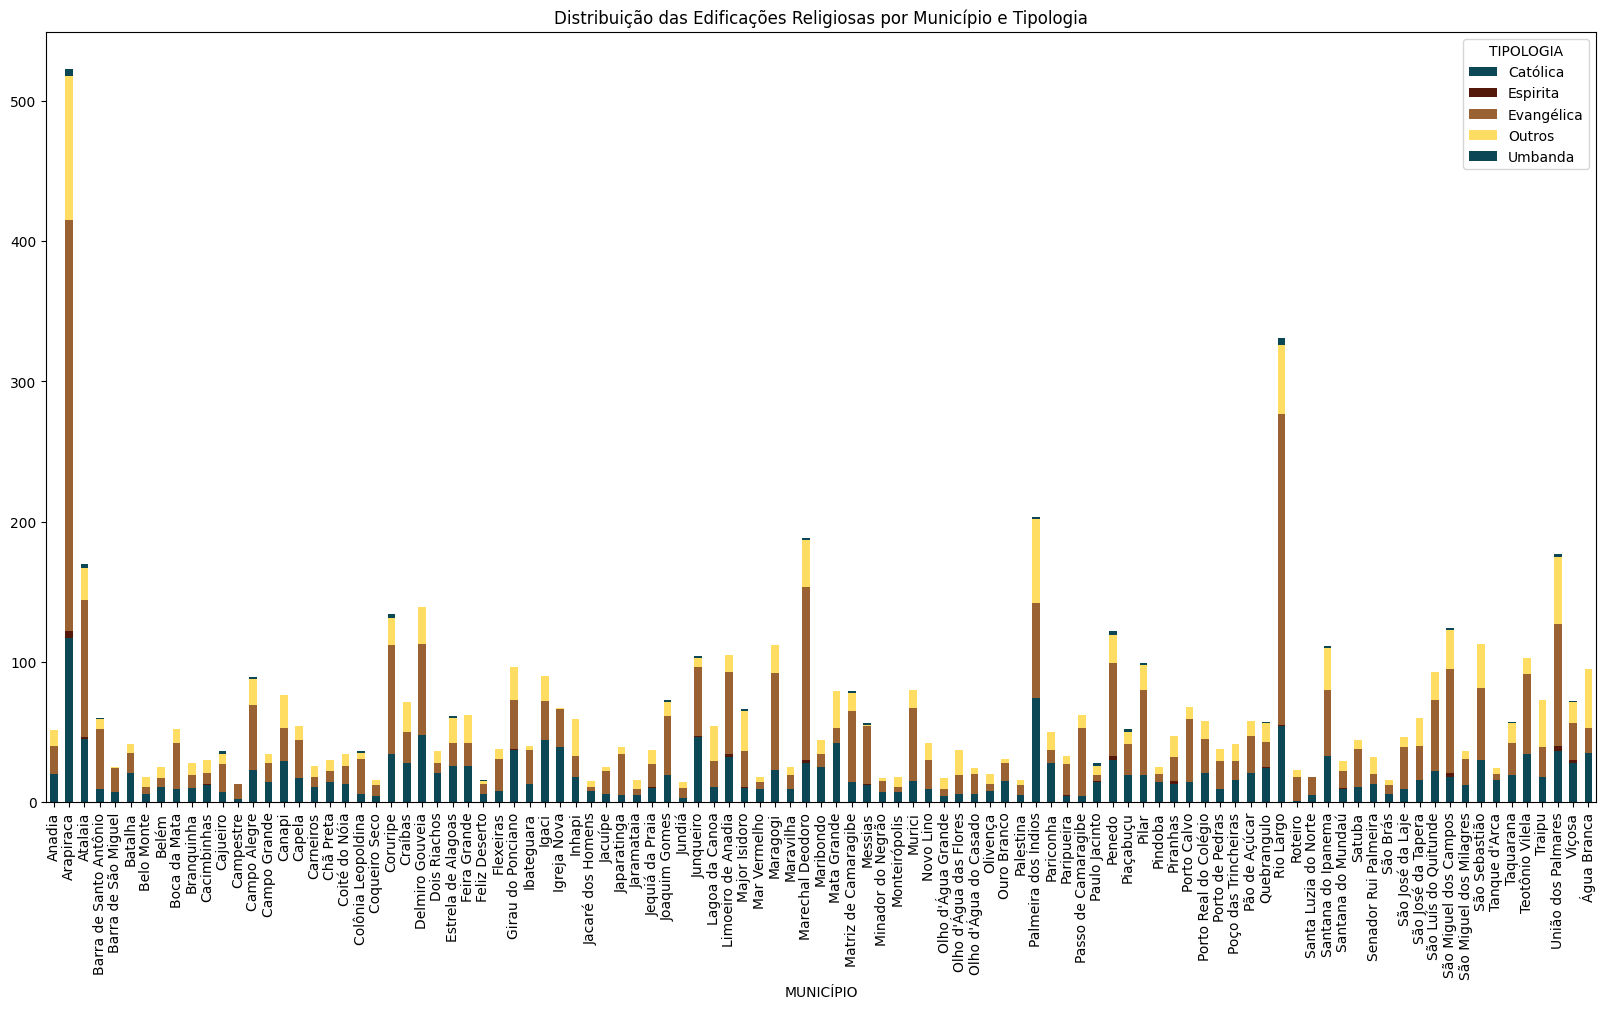

In [27]:
# Gráfico bonito e diferentes para caber cada municipio, retirando 'Maceió' para melhor visualização
resultado_final_sem_maceio = resultado_final[resultado_final['MUNICÍPIO'] != 'Maceió']
resultado_final_sem_maceio.groupby(['MUNICÍPIO', 'TIPOLOGIA']).size().unstack().plot(kind='bar', stacked=True, color=cores_pet_1, figsize=(20, 10))

plt.title('Distribuição das Edificações Religiosas por Município e Tipologia')

plt.show()


#### Gráfico por região e tipologia (Sem a capital Maceió)

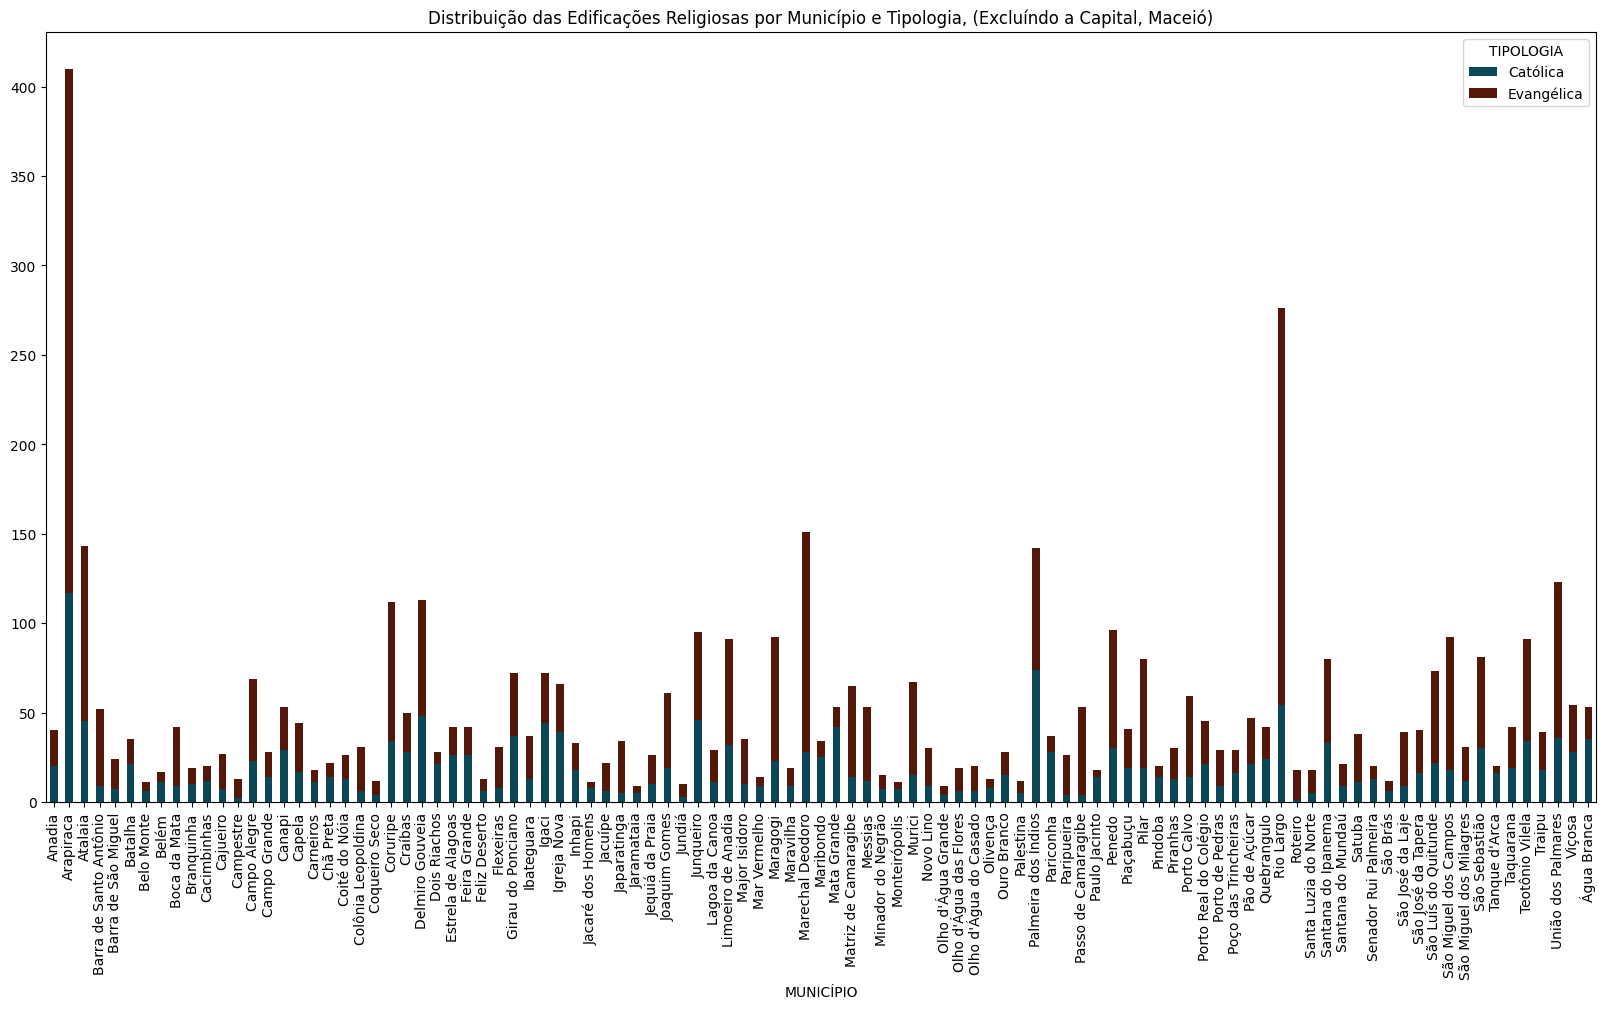

In [28]:
# Gráfico comparando apenas tipologia 'Católica' e 'Evangélica' sem 'Maceió'
resultado_final_cat_ev = resultado_final[(resultado_final['TIPOLOGIA'] == 'Católica') | (resultado_final['TIPOLOGIA'] == 'Evangélica')]
resultado_final_cat_ev_sem_maceio = resultado_final_cat_ev[resultado_final_cat_ev['MUNICÍPIO'] != 'Maceió']
resultado_final_cat_ev_sem_maceio.groupby(['MUNICÍPIO', 'TIPOLOGIA']).size().unstack().plot(kind='bar', stacked=True, color=cores_pet_1, figsize=(20, 10))
plt.title('Distribuição das Edificações Religiosas por Município e Tipologia, (Excluíndo a Capital, Maceió)')
plt.show()


#### Gráfico por tipologia

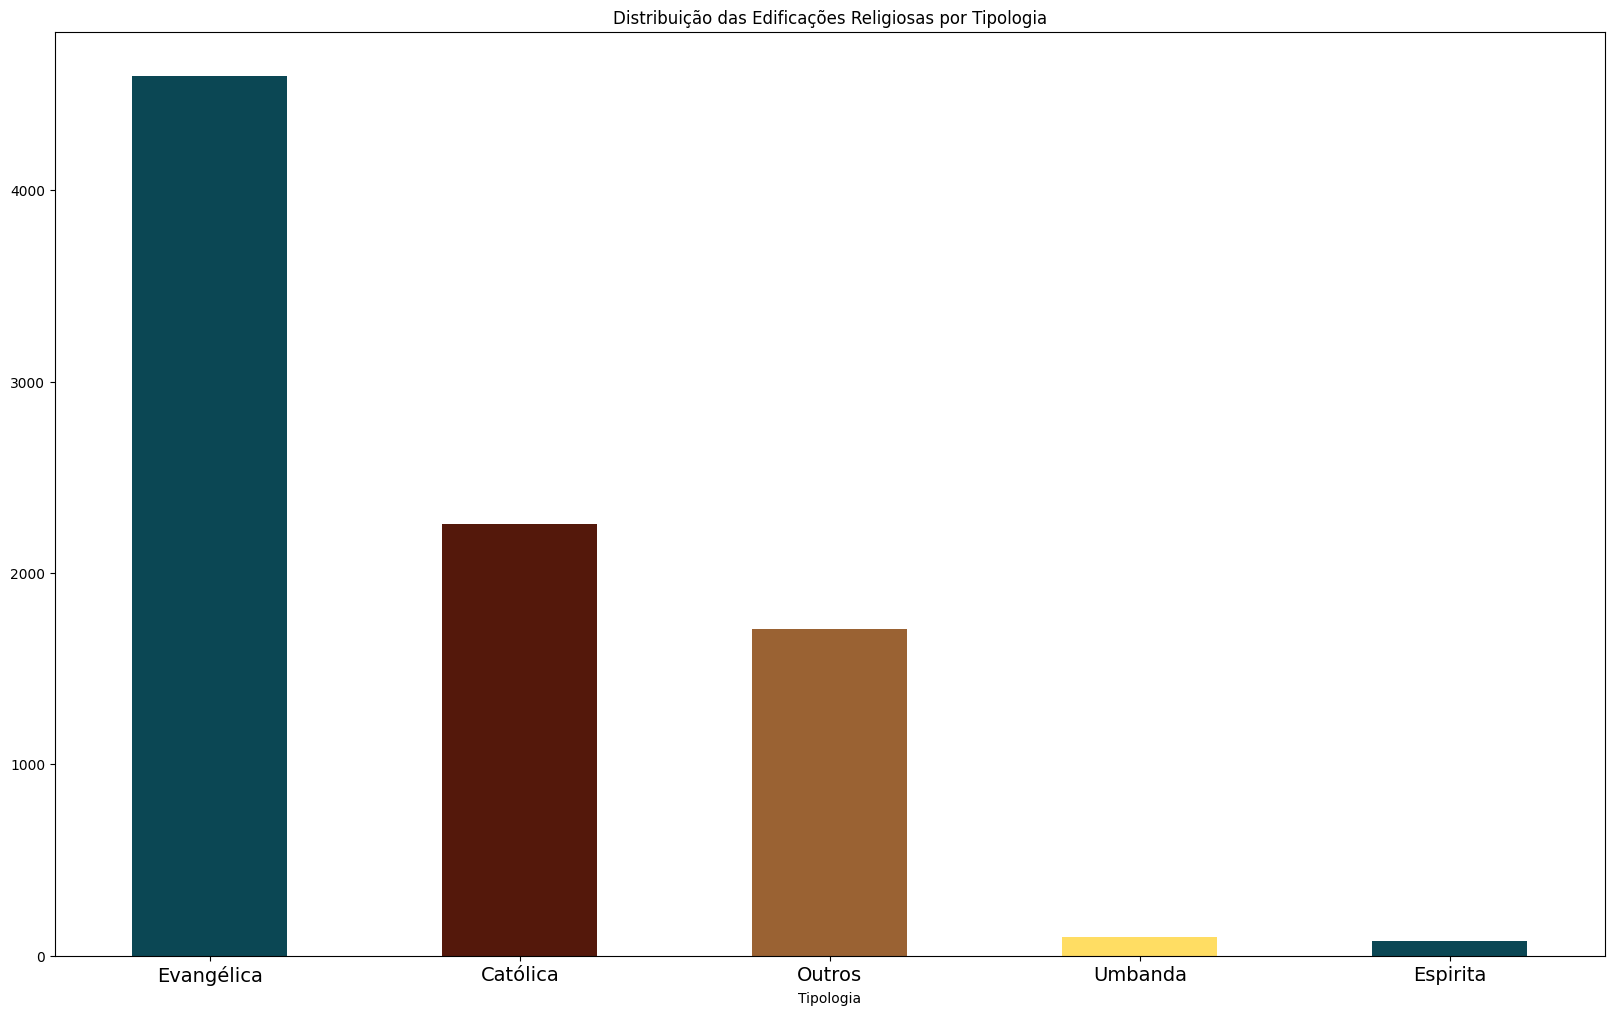

In [29]:
# Gráfico para saber a % de tipos de igrejas gráfico de barras
resultado_final['TIPOLOGIA'].value_counts().plot(kind='bar', color=cores_pet_1, figsize=(20, 12))
plt.title('Distribuição das Edificações Religiosas por Tipologia')
plt.xlabel('Tipologia')
plt.xticks(rotation=0, ha='center', fontsize = 14)  # 'ha' é para alinhar os rótulos à direita
plt.show()

#### Gráfico em Maceió por Bairro e Tipologia

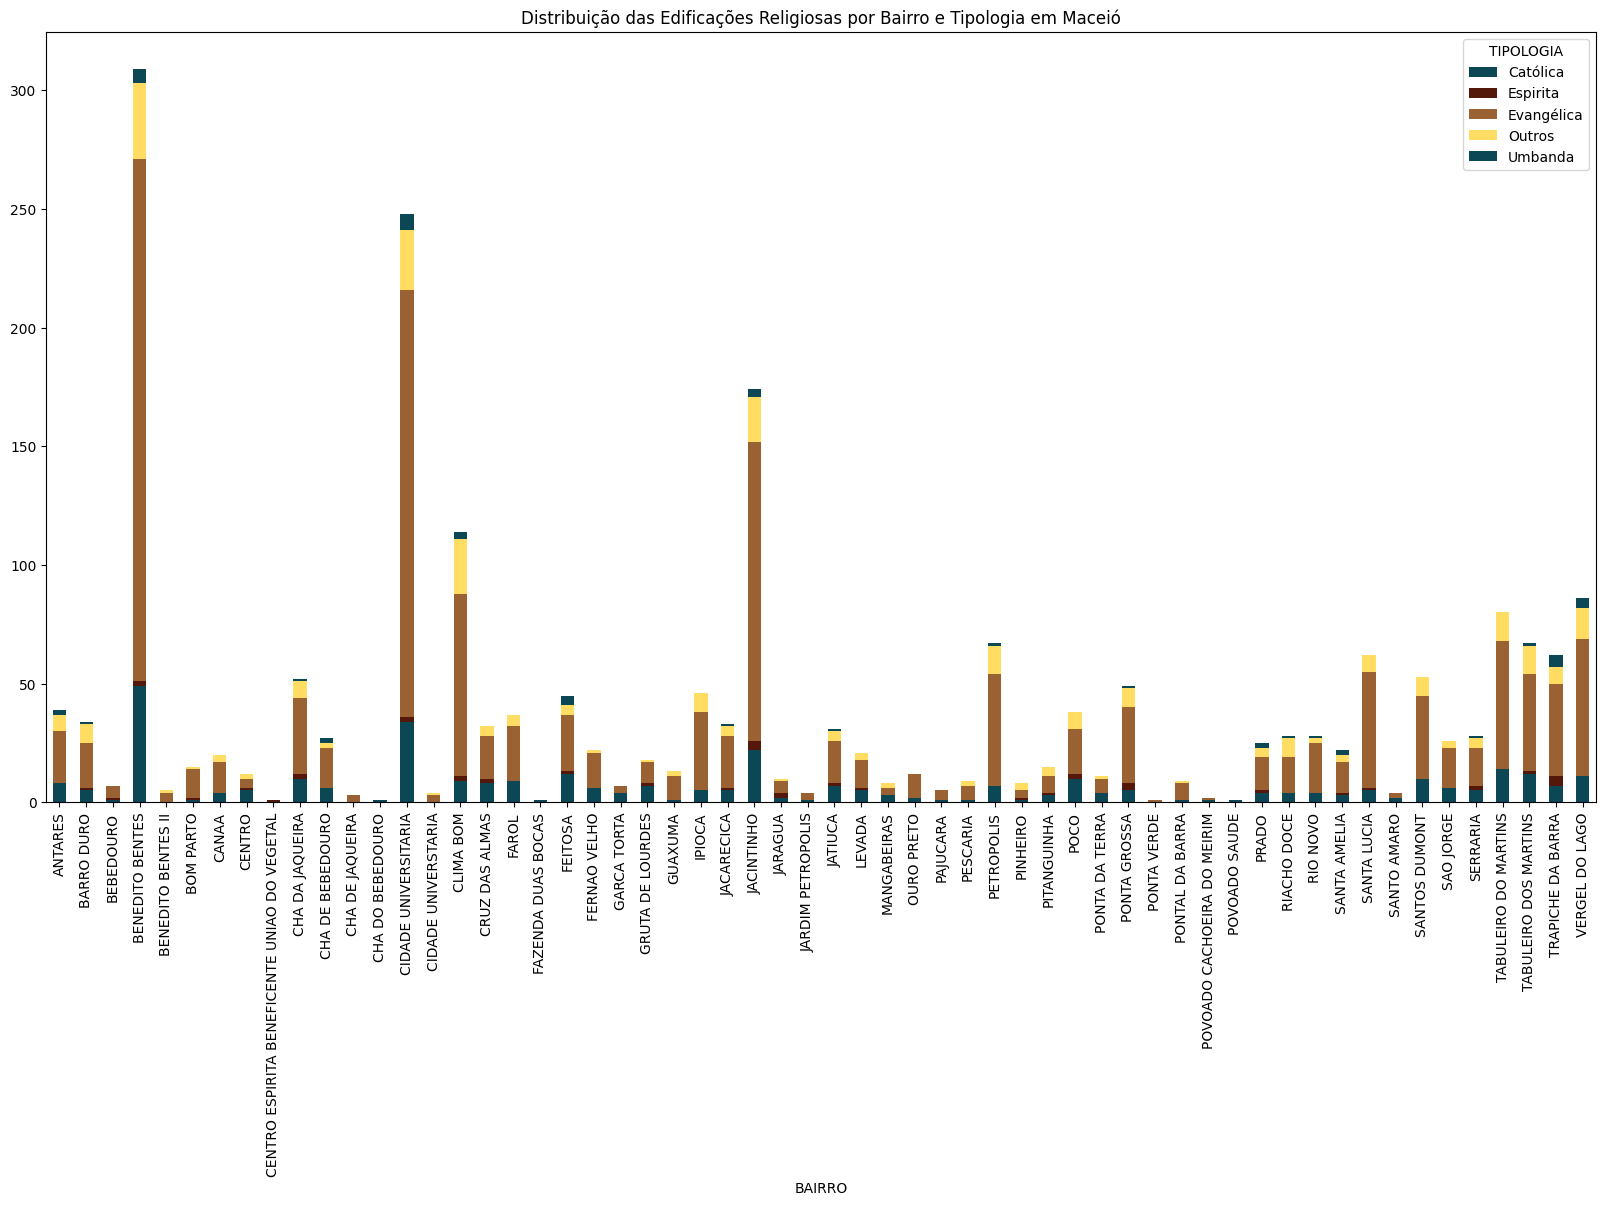

In [30]:
# Gráfico em Maceió por bairro e tipologia
resultado_final_maceio = resultado_final[resultado_final['MUNICÍPIO'] == 'Maceió']
resultado_final_maceio.groupby(['BAIRRO', 'TIPOLOGIA']).size().unstack().plot(kind='bar', stacked=True, color=cores_pet_1, figsize=(20, 10))
plt.title('Distribuição das Edificações Religiosas por Bairro e Tipologia em Maceió')
plt.show()

# 3. Visualizações Interativas

In [31]:
df_igrejas = resultado_final.copy()

In [32]:
# Lendo o arquivo shapefile
data = gpd.read_file(r'C:\Users\lucas\Desktop\PYTHON\CURSOS\CURSO DE PYTHON UDEMY\Mapas_shp\AL_Municipios_2022.shp')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2700102,Água Branca,AL,468.229,"POLYGON ((-37.80251 -9.32908, -37.80252 -9.328..."
1,2700201,Anadia,AL,186.134,"POLYGON ((-36.3209 -9.61012, -36.32087 -9.6101..."
2,2700300,Arapiraca,AL,345.655,"POLYGON ((-36.66698 -9.81639, -36.66702 -9.816..."
3,2700409,Atalaia,AL,533.258,"POLYGON ((-36.05322 -9.42406, -36.0531 -9.4240..."
4,2700508,Barra de Santo Antônio,AL,131.364,"POLYGON ((-35.48203 -9.34808, -35.47249 -9.358..."
...,...,...,...,...,...
97,2709103,Taquarana,AL,153.841,"POLYGON ((-36.40766 -9.65776, -36.428 -9.66357..."
98,2709152,Teotônio Vilela,AL,299.221,"POLYGON ((-36.34807 -9.88157, -36.33942 -9.882..."
99,2709202,Traipu,AL,681.577,"POLYGON ((-36.95589 -10.01342, -36.9559 -10.01..."
100,2709301,União dos Palmares,AL,420.376,"POLYGON ((-36.04587 -9.06433, -36.04581 -9.064..."


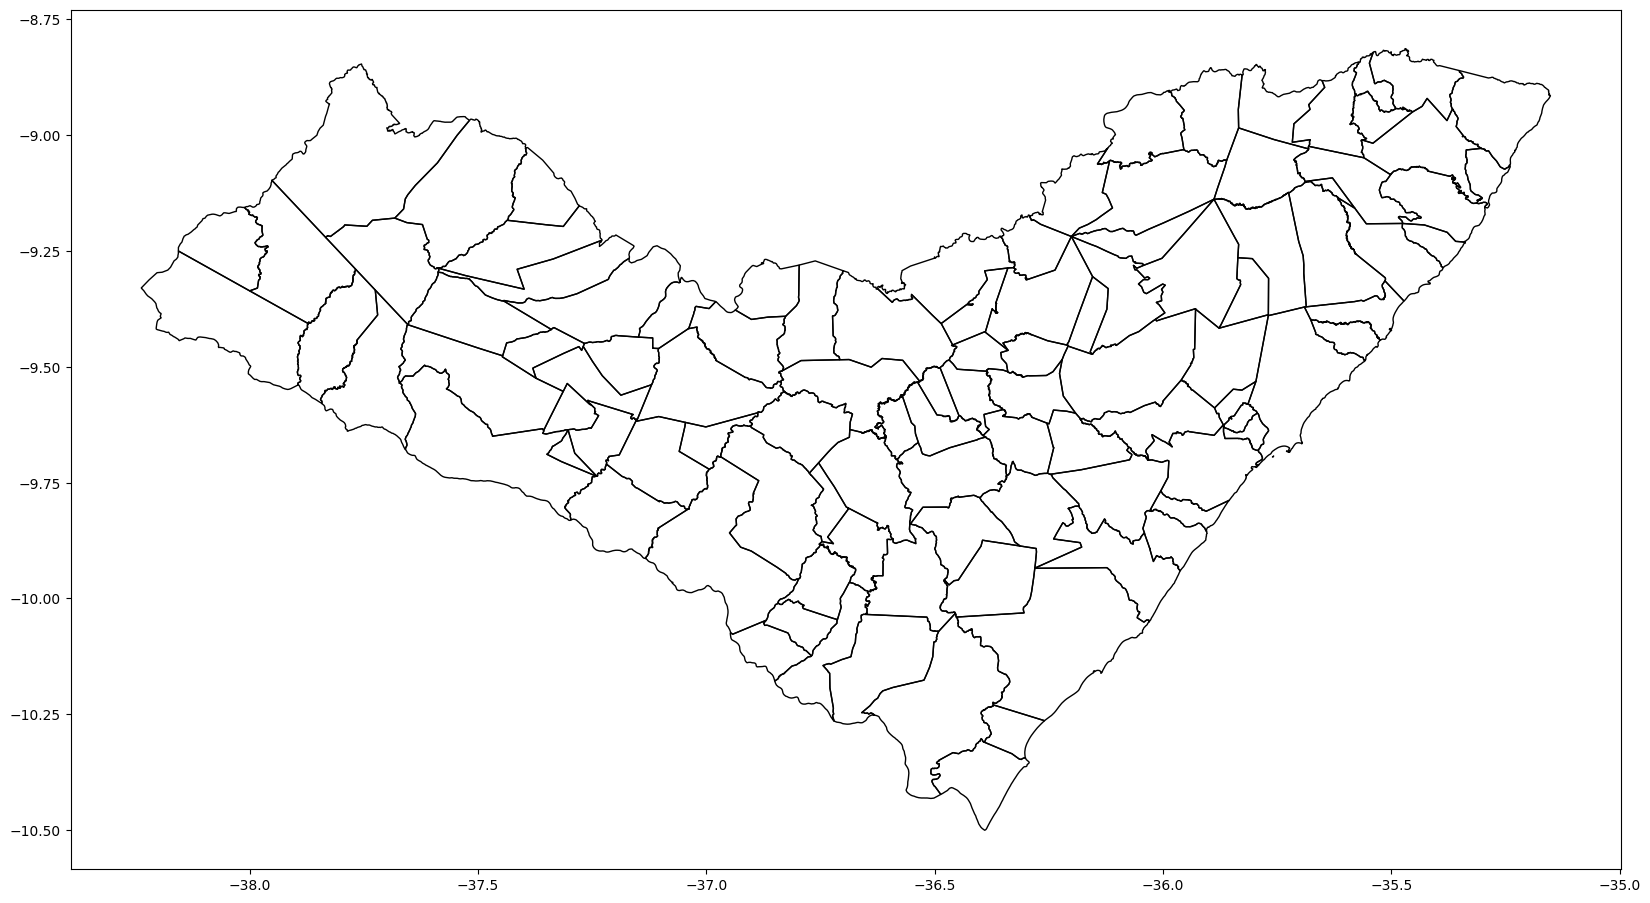

In [33]:
# Visualizando o mapa
data.plot(figsize=(20, 20), facecolor='none', edgecolor='black')
data

In [34]:
# Filtrar apenas os municípios de Alagoas
gdf_mcz = data[data['NM_MUN'] == 'Maceió']
gdf_mcz

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
46,2704302,Maceió,AL,509.32,"MULTIPOLYGON (((-35.79523 -9.52383, -35.78579 ..."


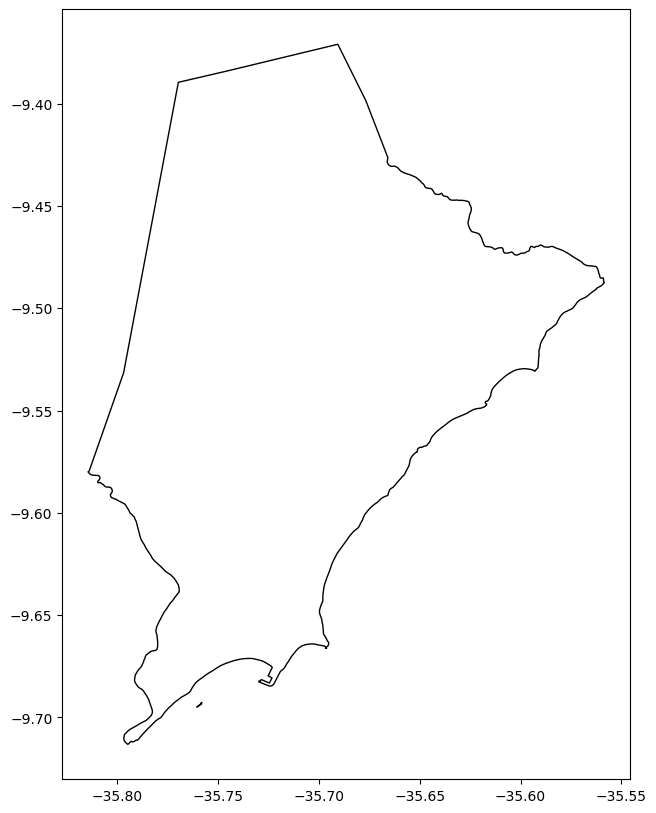

In [35]:
# Plotar o mapa de Maceió
gdf_mcz.plot(figsize=(10, 10), facecolor='none', edgecolor='black')
plt.show()

In [36]:
# Salvando os dados
gdf_al = data.copy() # Uma copia com todos os municípios

# Salvando
gdf_al.to_file('alagoas.json', driver='GeoJSON')
gdf_mcz.to_file('maceio.json', driver='GeoJSON')

# Carregando o Arquivo Igrejas

In [37]:
df_igrejas.columns

Index(['REGIÃO', 'CD_MUN', 'LATITUDE', 'LONGITUDE', 'MUNICÍPIO', 'CEP',
       'BAIRRO', 'EDIFICAÇÃO_RELIGIOSA', 'TIPOLOGIA'],
      dtype='object')

In [38]:
# Mostrando os dados de Lagitude e Longitude
'''
IMPORTANTE:
VERIFICAR SE POSSUIS DADOS 'NAN'. 
EM CASO POSITIVO, DROPAR TODOS.
'''
df_igrejas[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,-9.710253,-36.259264
1,-9.683089,-36.299757
2,-9.685669,-36.303865
3,-9.684968,-36.304600
4,-9.691578,-36.306965
...,...,...
8731,-9.265637,-37.934381
8732,-9.261478,-37.936132
8733,-9.260467,-37.932937
8734,-9.383123,-37.887669


### Criando um GeoDataFrame

In [40]:
# Criando a coluna geometry
df_igrejas['geometry'] = None
# Aidicionando a longitude.
# Pode utilizar esse código:
# df_igrejas['geometry'] = resultado_final.apply(lambda x: Point((float(x.LONGITUDE), float(x.LATITUDE))), axis=1) # Mais rápido
# Ou esse:
for index, row in df_igrejas.iterrows():
    df_igrejas.loc[index, 'geometry'] = Point(row['LONGITUDE'], row['LATITUDE']) # Mais lento

In [41]:
# O tipo de df_igrejas ainda está como DataFrame. Será necessário a conversão para GeoDataFrame
type(df_igrejas)

pandas.core.frame.DataFrame

In [42]:
# Convertendo para GeoDataFrame
gdf_igrejas = gpd.GeoDataFrame(df_igrejas, geometry='geometry')
# Verificando a conversão
type(df_igrejas)

pandas.core.frame.DataFrame

<Axes: >

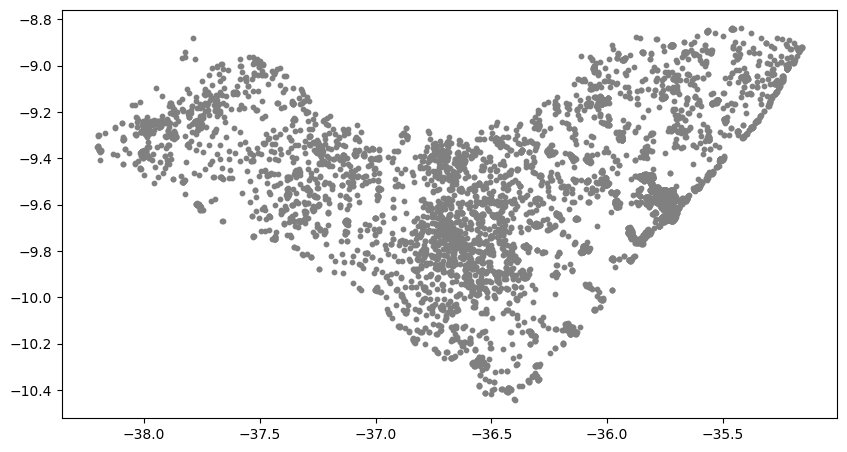

In [43]:
# Plotando o DF Igrejas
gdf_igrejas.plot(figsize=(10, 10), markersize=10, color='grey')

# PLOTAGEM DE MAPAS

#### Em ALAGOAS

<Axes: >

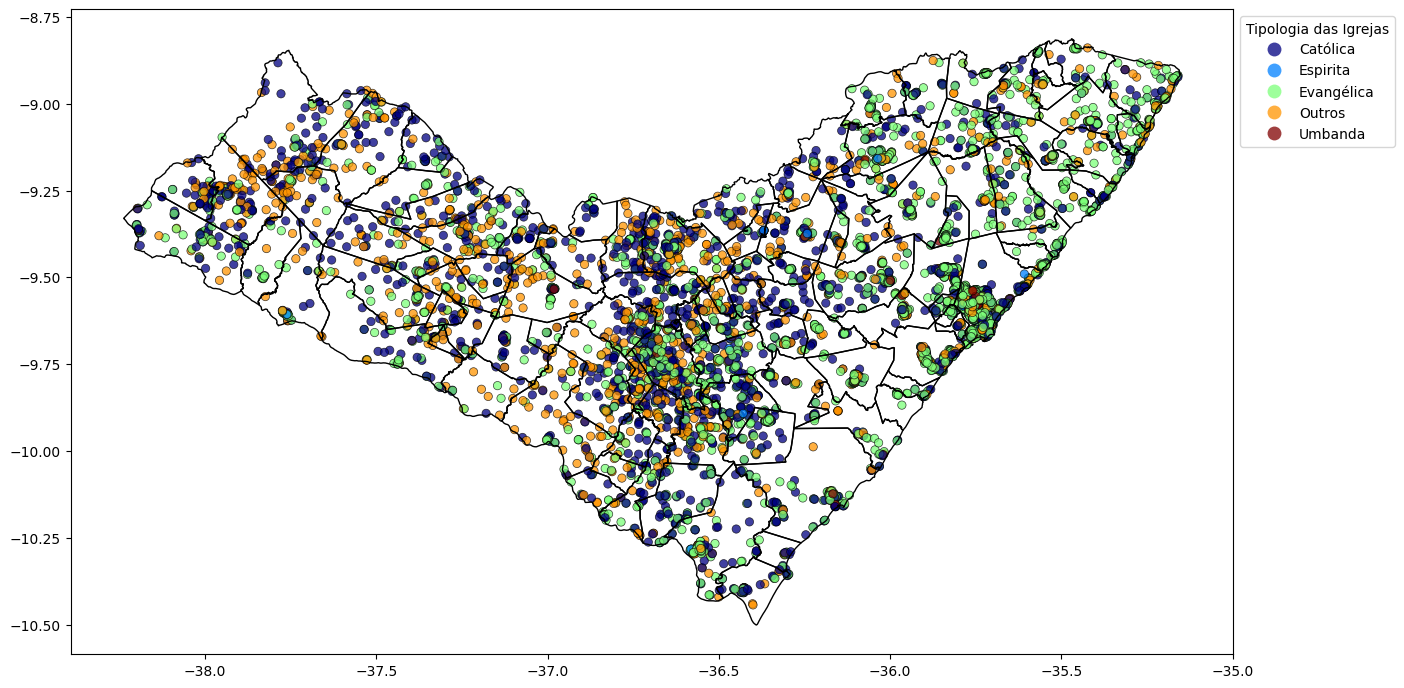

In [44]:
# Mostrando os dados com MatPlot
fig, ax = plt.subplots(figsize = (15, 15))

gdf_igrejas.plot(ax=ax,
                 column='TIPOLOGIA', # Coluna que será usada para colorir os pontos
                 legend=True, # Mostrar a legenda
                 legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'title': 'Tipologia das Igrejas'}, # Configurações da legenda
                 cmap='jet', # Cor dos pontos
                 edgecolor='black', # Cor da borda das fronteiras
                 linewidth=0.5, # Largura da borda
                 alpha=0.75) # Transparência dos pontos
gdf_al.plot(ax = ax, facecolor = 'none', edgecolor = 'black') # Colocando o mapa de ALAGOAS pode ser o de MCZ

# Colorindo com a coluna 'TIPOLOGIA'

### Em Maceió

In [45]:
polygon_mcz = gdf_mcz.iloc[0].geometry # Pode ser o de Maceió

In [46]:
# Operação de intersecção
gdf_igrejas_mcz = gdf_igrejas[gdf_igrejas.intersects(polygon_mcz)] # Para alagoas é gdf_igrejas

<Axes: >

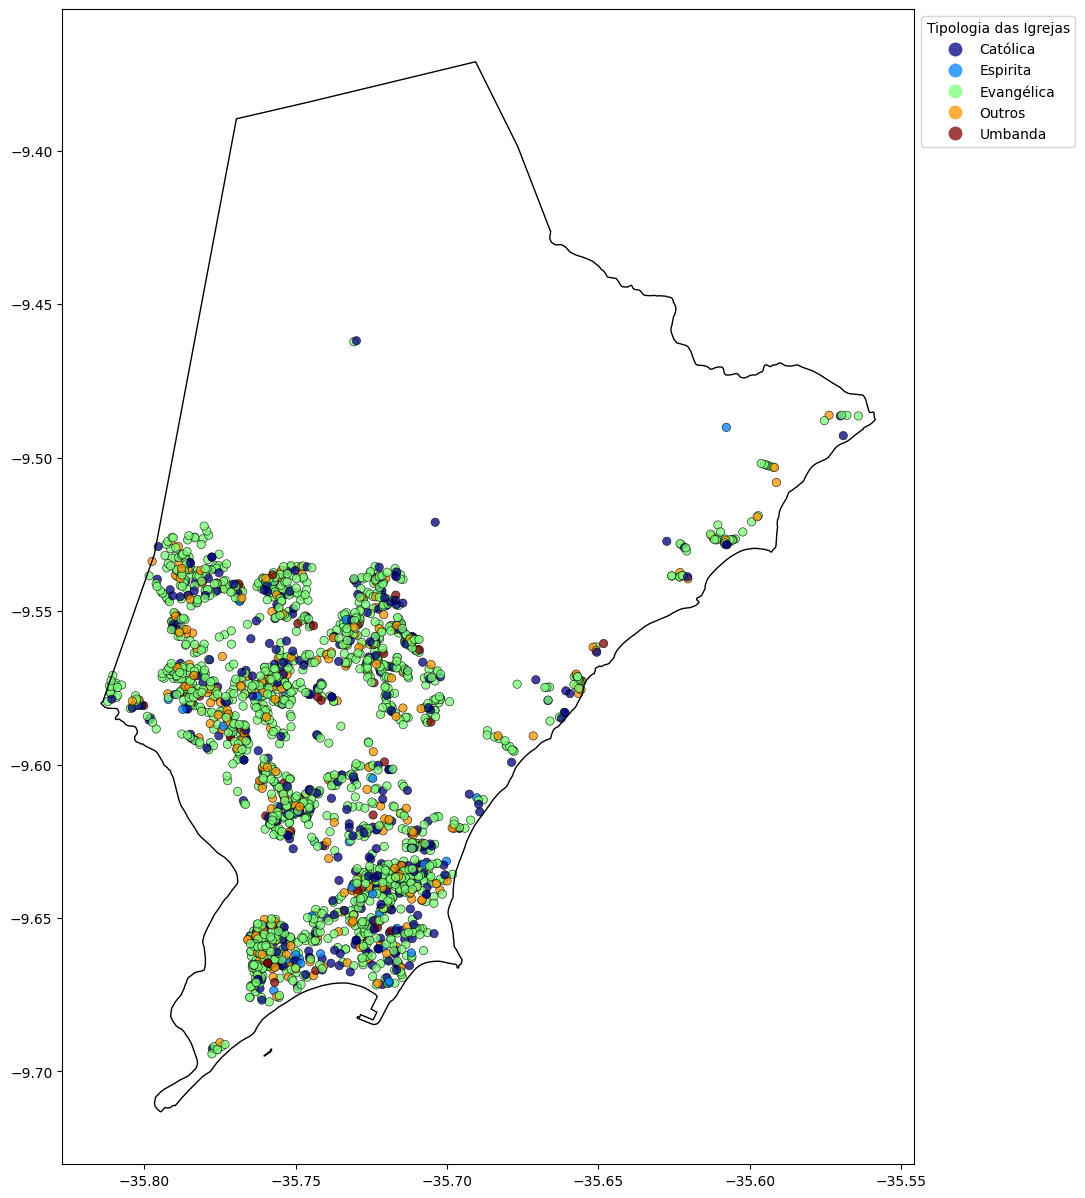

In [47]:
# Visualizando
fig, ax = plt.subplots(figsize = (15, 15))

gdf_igrejas_mcz.plot(ax=ax,
                 column='TIPOLOGIA', # Coluna que será usada para colorir os pontos
                 legend=True, # Mostrar a legenda
                 legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'title': 'Tipologia das Igrejas'}, # Configurações da legenda
                 cmap='jet', # Cor dos pontos
                 edgecolor='black', # Cor da borda das fronteiras
                 linewidth=0.5, # Largura da borda
                 alpha=0.75) # Transparência dos pontos
gdf_mcz.plot(ax = ax, facecolor = 'none', edgecolor = 'black') # Colocando o mapa de ALAGOAS pode ser o de MCZ

# MAPAS INTERATIVOS

# Criando agrupamentos (clusters) e Melhorando a visualização

In [50]:
# Criando o mapa
fmap = folium.Map(location=[gdf_igrejas['LATITUDE'].mean(), gdf_igrejas['LONGITUDE'].mean()], zoom_start=8)

# Criando o cluster de marcadores
mc = MarkerCluster()

# Adicionando os marcadores ao cluster com popups personalizados
for idx, row in gdf_igrejas.iterrows():
    popup_content = f"""
    <strong>{row['EDIFICAÇÃO_RELIGIOSA']}</strong><br>
    Tipologia: {row['TIPOLOGIA']}<br>
    Bairro: {row['BAIRRO']}<br>
    Município: {row['MUNICÍPIO']}<br>
    Latitude: {row['LATITUDE']}<br>
    Longitude: {row['LONGITUDE']}
    """
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(mc)

# Adicionando o cluster ao mapa
mc.add_to(fmap)

# Definindo os limites do mapa e outras customizações
limites = folium.features.GeoJson(gdf_al,
                                  style_function=lambda feature: {
                                      'color': 'grey',
                                      'weight': 2,
                                      'fillOpacity': 0.0
                                  })

# Adicionando os limites ao mapa
fmap.add_child(limites)

# Salvando o mapa em um arquivo HTML
fmap.save('Mapa_Interativo_Igrejas_AL.html')


# Criação de mapa de calor (HeatMap)

In [51]:
# Criando o mapa
fmap = folium.Map(location=[gdf_igrejas['LATITUDE'].mean(), gdf_igrejas['LONGITUDE'].mean()], zoom_start=8) # Criando o mapa

# Criando e adicionando o mapa de calor
heat_map = HeatMap(data=gdf_igrejas[['LATITUDE', 'LONGITUDE']].values, radius=15) # Criando o mapa de calor
fmap.add_child(heat_map)

# Criando o cluster de marcadores
mc = MarkerCluster() # Criando o cluster para os marcadores e popups

# Adicionando os marcadores ao cluster com popups personalizados
for idx, row in gdf_igrejas.iterrows():
    popup_content = f"""
    <strong>{row['EDIFICAÇÃO_RELIGIOSA']}</strong><br>
    Tipologia: {row['TIPOLOGIA']}<br>
    Bairro: {row['BAIRRO']}<br>
    Município: {row['MUNICÍPIO']}<br>
    Latitude: {row['LATITUDE']}<br>
    Longitude: {row['LONGITUDE']}
    """
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(mc)

# Adicionando o cluster ao mapa
mc.add_to(fmap)

# Definindo os limites do mapa e outras customizações
limites = folium.features.GeoJson(gdf_al,
                                  style_function=lambda feature: {
                                      'color': 'grey',
                                      'weight': 2,
                                      'fillOpacity': 0.0
                                  })

# Adicionando os limites ao mapa
fmap.add_child(limites)

# Salvando o mapa em um arquivo HTML
fmap.save('Mapa_Interativo_Calor_Igrejas_AL.html')
